<a href="https://colab.research.google.com/github/anastasiiaCher/python-for-DPaV/blob/main/labs/%D0%9B%D0%A03_%D0%9E%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Постановка задачи


Выполнил: ДЖАРАЯН АРЕГ

**Цель работы:** исследование и обработка данных для повышения их качества.

**Краткое описание:** в лабораторной работе приводится поэтапный план изучения и обработки намеренно не предобработанных данных. Необходимо выполнить все этапы плана и оценить результаты преобразований.

# Данные



В папке [Data/lab3](https://drive.google.com/drive/folders/1437z7m5Ut4WUJOhJg1oZz13dtBpxgFKs?usp=share_link) расположена таблица `monster_com_job_sample.com` с данными о вакансиях. Также эти данные с описанием и примерами обработки можно найти на [kaggle](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data#).

##### **Формат данных**

```
country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
United States of America,US,"",No,jobs.monster.com,"TeamSoft is seeing an IT Support Specialist to join our client in Madison, WI. The ideal candidate must have at least 6 years of experience in the field. They need to be familiar with a variety of the field's concepts, practices, and procedures as this position relies on extensive experience and judgment to plan and accomplish goals. Required Skills:вАҐ Call tracking softwareвАҐ Phone based technical supportвАҐ Problem documentation and communicationвАҐ Remote Desktop Management ToolsвАҐ Respond to customer requestsвАҐ General understanding of LANDeskвАҐ Microsoft Office 2007 SuiteFind out why TeamSoft is the Madison area's technology leader with over 200 IT consultants. Owned, operated, and managed by IT consultants, TeamSoft is the clear choice for your career. Join the TeamSoft family today!Did you know?вАҐ TeamSoft offers salaried options for many positions that include 5 weeks PTO and great benefits!вАҐ TeamSoft has been in business since 1996вАҐ TeamSoft's owners are local IT professionals who possess a wealth of experience in application development, business analysis, and project managementвАҐ TeamSoft's Recruiters are knowledgeable, friendly, and ready to help you make your next great career moveвАҐ TeamSoft offers a full benefits suite to all of our W2 consultants, including a 401k plan with a 100% vested 4% dollar for dollar matchвАҐ Our targeted selection process is designed to get to know your strengths and career interests and provide you with the best chance for success in your new positionвАҐ Our longest running consultant has been with us for 16 yearsвАҐ Consultants can participate in our charitable giving committee. To date, TeamSoft's charitable giving committee has donated over $100,000!TeamSoft is owned by local IT professionals. Our team also has deep experience with IT staffing. Our clients understand this and rely on our expertise. That is why TeamSoft is the Madison Area's largest privately owned IT consulting firm, with more than 200 current consultants! With over 50 active clients, TeamSoft will give you the greatest exposure to the widest range of IT careers.Our owners possess a combined 60+ years of IT consulting experience. Our recruiting and Account Management staff are very well-versed in our client markets. We get you. We know you. We know what you do every day. And we know what you deal with on the job.You take your career seriously and so do we. At TeamSoft you are not just a resume or number. Our goal is to create long-term partnerships with each of our consultants, and according to feedback from many of them, we are very good at this. Click HERE to see what our consultants have to say about working with TeamSoft.TeamSoft -- Promote yourself!TeamSoft is an equal employment opportunity employer functioning under an Affirmative Action Plan.",IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702","",http://jobview.monster.com/it-support-technician-job-madison-wi-us-167855963.aspx?mescoid=1500134001001&jobPosition=20,"",IT/Software Development,11d599f229a80023d2f40e7c52cd941e
United States of America,US,"",No,jobs.monster.com,"The Wisconsin State Journal is seeking a flexible and motivated reporter/editor to lead its three-person business desk. WeвАЩre looking for an experienced journalist able to spot trends, be a watchdog and reflect the Madison areaвАЩs vibrant entrepreneurial community. This is a hybrid reporting and editing position that calls for a fleet-footed, multimedia storyteller able to maximize the newspaperвАЩs online presentation while also editing two sections a week. Candidates must have strong news judgment, be well versed in business news and trends and be able to quickly prioritize coverage.At least five yearsвАЩ experience reporting or editing for digital and print platforms desired. To be considered for the position, applicants must apply online.¬†As part of your online application, please attach five samples of your work or links to five recent stories.Wisconsin State Journal, 1901 Fish Hatchery Road, Madison, WI 53713Affirmative Action/Equal Opportunity Employer/Pre-employment drug testing appliesPI94338362Apply Here",Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-editor-job-madison-wi-us-167830105.aspx?mescoid=2700437001001&jobPosition=7,"","",e4cbb126dabf22159aff90223243ff2a
...
```

##### **Описание полей**
 - ```country``` — наименование страны;
 - ```country_code``` — код страны;
 - ```date_added``` — дата размещения вакансии;
 - ```has_expired``` — актуальность вакансии;
 - ```job_board``` — агрегатор вакансий, с которого собраны данные;
 - ```job_description``` — описание вакансии;
 - ```job_title``` — наименование должности;
 - ```job_type``` — вид занятости;
 - ```location``` — метоположение организации;
 - ```organization``` — наименование организации;
 - ```page_url``` — ссылка на страницу с вакансией;
 - ```salary``` — заработная плата;
 - ```sector``` — сфера деятельности;
 - ```uniq_id``` — уникальный идентификатор записи о вакансии.

# Понимание данных

In [1]:
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns

В датасете есть несколько столбцов, в каждой ячейке которых записано одно и то же значение. Есть столбцы, в которых формат записи значений не стандартизирован. А есть такие, где указана информация, не соответствующая названию столбца.

**Первый этап изучения данных** – понять, какие основные проблемы предстоит решить для каждого из столбцов. Для этого загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [18]:
import pandas as pd

df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')

# Просмотр информации о типах данных
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7747 entries, 0 to 7746
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          7747 non-null   object
 1   country_code     7747 non-null   object
 2   date_added       33 non-null     object
 3   has_expired      7747 non-null   object
 4   job_board        7747 non-null   object
 5   job_description  7747 non-null   object
 6   job_title        7747 non-null   object
 7   job_type         7060 non-null   object
 8   location         7747 non-null   object
 9   organization     4919 non-null   object
 10  page_url         7747 non-null   object
 11  salary           1088 non-null   object
 12  sector           5723 non-null   object
 13  uniq_id          7747 non-null   object
dtypes: object(14)
memory usage: 847.5+ KB


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.


Название столбца | Тип данных | Проблемы
--- | --- | ---
```country``` |
```country_code``` |
```date_added``` |
```has_expired``` |
```job_board``` |
```job_description``` |
```job_title``` |
```job_type``` |
```location``` |
```organization``` |
```page_url``` |
```salary``` |
```sector``` |
```uniq_id``` |

### Оценка пустых ячеек в датасете

Выясните, в каких столбцах, строках и в каком количестве отсутствуют данные:
1. С помощью модуля `pandas` составьте таблицу, где каждому названию столбца будет сопоставлено общее количество ячеек и количество пустых ячеек.
2. Подсчитайте количество строк датасета, в которых пустыми являются более 75% ячеек.
3. Визуализируйте число пропусков в датасете с помощью модуля, построив столбчатую диаграмму. Для удобства можно воспользоваться модулем `missingno`.


Количество пустых ячеек по столбцам:
                 Всего ячеек  Пустые ячейки
country                 7747              0
country_code            7747              0
date_added              7747           7714
has_expired             7747              0
job_board               7747              0
job_description         7747              0
job_title               7747              0
job_type                7747            687
location                7747              0
organization            7747           2828
page_url                7747              0
salary                  7747           6659
sector                  7747           2024
uniq_id                 7747              0

Количество строк с более чем 75% пустых ячеек: 0


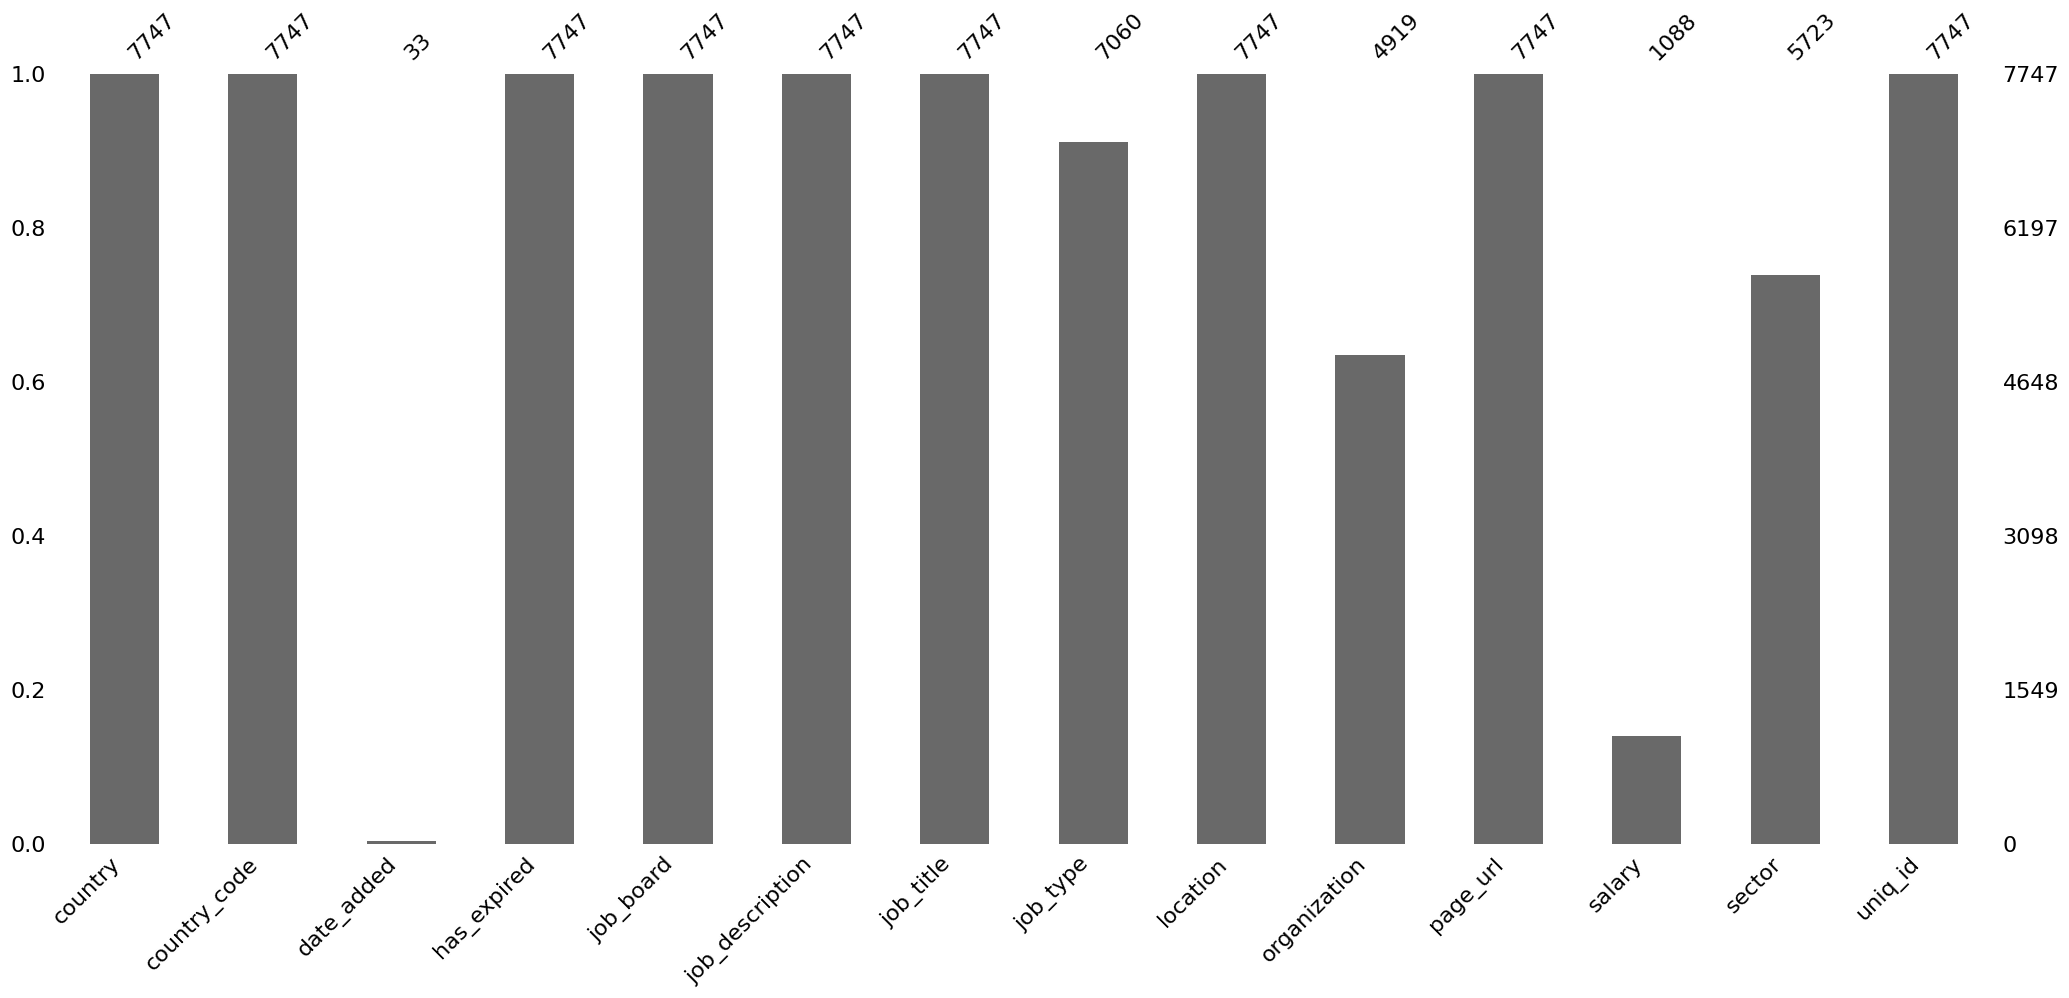

In [19]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# 1️⃣ Чтение CSV с "терпимым" парсером
df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')

# 2️⃣ Таблица с количеством пустых ячеек по столбцам
missing_table = pd.DataFrame({
    'Всего ячеек': df.shape[0],
    'Пустые ячейки': df.isna().sum()
})
print("Количество пустых ячеек по столбцам:")
print(missing_table)

# 3️⃣ Подсчет строк, где пустыми являются >75% ячеек
threshold = 0.75 * df.shape[1]  # 75% от числа столбцов
rows_with_many_missing = df[df.isna().sum(axis=1) > threshold].shape[0]
print(f"\nКоличество строк с более чем 75% пустых ячеек: {rows_with_many_missing}")

# 4️⃣ Визуализация пропусков
plt.figure(figsize=(12,6))
msno.bar(df)
plt.show()


Проверьте, как изменится размер датасета, если принять решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [20]:
import pandas as pd

# Чтение CSV безопасным способом
df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')

print("Размер исходного датасета:", df.shape)

# Удаление всех строк с хотя бы одним пустым значением
df_clean = df.dropna()

print("Размер датасета после удаления строк с пустыми значениями:", df_clean.shape)

# Вывод разницы
removed_rows = df.shape[0] - df_clean.shape[0]
print(f"Удалено строк: {removed_rows}")


Размер исходного датасета: (7747, 14)
Размер датасета после удаления строк с пустыми значениями: (2, 14)
Удалено строк: 7745


### Первичная оценка данных в столбцах

Изучите данные в столбцах датасета, ответив на следующие вопросы:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли такие значения, которые встречаются более чем в одном столбце?
3. Есть ли столбцы, данные в которых не соответствуют названию столбца?

In [21]:
# Подсчет уникальных значений в каждом столбце
unique_counts = df.nunique()
single_value_columns = unique_counts[unique_counts == 1]
print("Столбцы с одним уникальным значением:")
print(single_value_columns)


Столбцы с одним уникальным значением:
country         1
country_code    1
has_expired     1
job_board       1
dtype: int64


In [22]:
# Получаем множество уникальных значений каждого столбца
unique_values_per_column = {col: set(df[col].dropna().unique()) for col in df.columns}

# Проверяем пересечения
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            common = unique_values_per_column[col1].intersection(unique_values_per_column[col2])
            if common:
                print(f"Общие значения между {col1} и {col2}: {list(common)[:5]} ...")  # первые 5 примеров


Общие значения между job_description и job_title: ['Please apply only if you are qualified.'] ...
Общие значения между job_description и location: ['Experis is a global leader in professional resourcing and project-based workforce solutions. We deliver in-demand talent for mission-critical positions, enhancing the competitiveness of the organizations and people we serve. Our goal is to maintain a positive candidate and client experience through fitting the best candidates with the best positions.Our client, a Fortune 100 company, seeks a candidate with the below qualifications:Role: Admin Assistant Location: Springfield, VA (22151) Duration: 6 month contract Responsibilities: -Report in to HR Lead to sort and scan WG\'s employee documents for audit purposes -Collect Mails -Sort Mails -Fax Mails to Service Team -Mail Distribution -File Mails -Scanning -File Room Maintenance - Keep Files organized in file room -Pulling and Providing Files for Audit support -Support data requests for Pers

In [23]:
# Пример: проверим, что в столбце salary не встречаются текстовые данные вроде 'New York'
invalid_salary = df[~df['salary'].str.replace(',', '').str.replace('$', '').str.replace(' ', '').str.isnumeric().fillna(True)]
print("Примеры строк в salary, где данные не числовые:")
print(invalid_salary[['salary']].head())


Примеры строк в salary, где данные не числовые:
                            salary
13            9.00 - 13.00 $ /hour
14   80,000.00 - 95,000.00 $ /year
19   60,000.00 - 72,000.00 $ /year
23    Excellent Pay and Incentives
29  70,000.00 - 100,000.00 $ /year


/tmp/ipython-input-477933454.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  invalid_salary = df[~df['salary'].str.replace(',', '').str.replace('$', '').str.replace(' ', '').str.isnumeric().fillna(True)]


### Дублирование данных

Для поиска дублирующихся строк выполните следующие действия:
1. В таблице есть столбец `uniq_id`, значения которого, как сказано в описании данных, являются уникальными идентификаторами записей. Проверьте, действительно ли в этом столбце все значения различны.
2. Проверьте, есть ли в таблице другие столбцы, значения которых в каждой строке различны.
3. Если игнорировать столбцы, где все значения различны, найдутся ли такие строки, для которых значения по всем остальным столбцам будут совпадать?

Оцените результаты поиска дубликатов.

In [24]:
import pandas as pd

# Чтение CSV безопасным способом
df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')

# Проверка уникальности uniq_id
total_ids = df['uniq_id'].shape[0]
unique_ids = df['uniq_id'].nunique()
print(f"Всего строк: {total_ids}")
print(f"Уникальных uniq_id: {unique_ids}")

if total_ids == unique_ids:
    print("Столбец uniq_id действительно уникален.")
else:
    print("Есть дубли в столбце uniq_id!")


Всего строк: 7747
Уникальных uniq_id: 7747
Столбец uniq_id действительно уникален.


In [25]:
# Подсчёт уникальных значений в каждом столбце
unique_counts = df.nunique()

# Столбцы, где все значения различны
fully_unique_columns = unique_counts[unique_counts == df.shape[0]].index.tolist()
print("Столбцы, где все значения уникальны:", fully_unique_columns)


Столбцы, где все значения уникальны: ['page_url', 'uniq_id']


In [26]:
# Столбцы для проверки дубликатов
columns_to_check = [col for col in df.columns if col not in fully_unique_columns]

# Поиск дубликатов
duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]
print(f"Количество дублирующихся строк по остальным столбцам: {duplicates.shape[0]}")

# Если нужно, можно вывести первые несколько дублирующихся строк
duplicates.head()


Количество дублирующихся строк по остальным столбцам: 401


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
56,United States of America,US,NaN,No,jobs.monster.com,DescriptionIf your goal is to begin a fantasti...,CASHIER Job in Houston,Full Time,"Houston, TX",Retail,http://jobview.monster.com/CASHIER-Job-Houston...,NaN,Experienced (Non-Manager),bcf70c41acf97ac8024c0b38c6fcaf87
96,United States of America,US,NaN,No,jobs.monster.com,Financial Advisor Northwestern MutualOur finan...,Financial Advisor / Financial Sales Representa...,Full Time Employee,"Houston, TX",Banking,http://jobview.monster.com/Financial-Advisor-F...,NaN,Sales/Retail/Business Development,e52d5e30ecdf97dd64a44f45bfc2032b
114,United States of America,US,NaN,No,jobs.monster.com,Event Promotions: Marketing / Advertising / Pu...,Event Promotions: Marketing / Advertising / Pu...,Full Time Employee,"Houston, TX 77057",RetailAdvertising and PR ServicesBusiness Serv...,http://jobview.monster.com/Event-Promotions-Ma...,NaN,Marketing/Product,4b8d7a4b2f7449a446a423a47fab633c
165,United States of America,US,NaN,No,jobs.monster.com,The Enrollment Agent I (EA I) supports Enrollm...,Enrollment Agent I* (-) Job in Denver,"Full Time, Employee","Denver, CO","Computer Software, Computer/IT Services",http://jobview.monster.com/Enrollment-Agent-I-...,NaN,Customer Support/Client Care,c76459c6a16425dcf473a4ccf5bdee33
221,United States of America,US,NaN,No,jobs.monster.com,Combined Insurance is seeking Sales Agents to ...,Sales Agent Job in Knoxville,Full Time,"Knoxville, TN",Insurance,http://jobview.monster.com/Sales-Agent-Job-Kno...,NaN,NaN,ec59e3f419b851259632b757183d7365


# Практические задания

В этом разделе необходимо обработать значения в трех столбцах датасета: `location`, `salary` и `job_type`. Цель обработки – стандартизировать данные в каждом из столбцов так, чтобы их можно было анализировать.

### Задание 1

В задании 1 необходимо провести обработку столбца `location`.

#### Задание 1.1

В столбце `location` представлена информация о местоположении организации, в которой открыта вакансия. Каждое значение столбца `location` содержит информацию о городе, коде штата и почтовом индексе.

Однако не в каждой строке есть все три характеристики местоположения, а также могут встречаться разные комбинации из них, записанные в виде строки в произвольном порядке и с разными разделителями.

Например, может быть указан только код штата, только название города или только индекс. Могут быть указаны любые две характеристики из трех.

**Формулировка задания:**
1. Определите, какие форматы встречаются.
2. Напишите одно или несколько регулярных выражений для поиска выявленных форматов.
3. Визуализируйте количество найденных форматов на столбчатой или круговой диаграмме. Также покажите на ней количество строк, в которых формат определить не удалось. Какие форматы встречаются чаще всего?

Ознакомиться с теоретическим материалом по работе с регулярными выражениями можно [по ссылке](https://colab.research.google.com/drive/1eFHdmt9OROLEDJRNc2wNmz0gpE1O3sKU?usp=sharing).

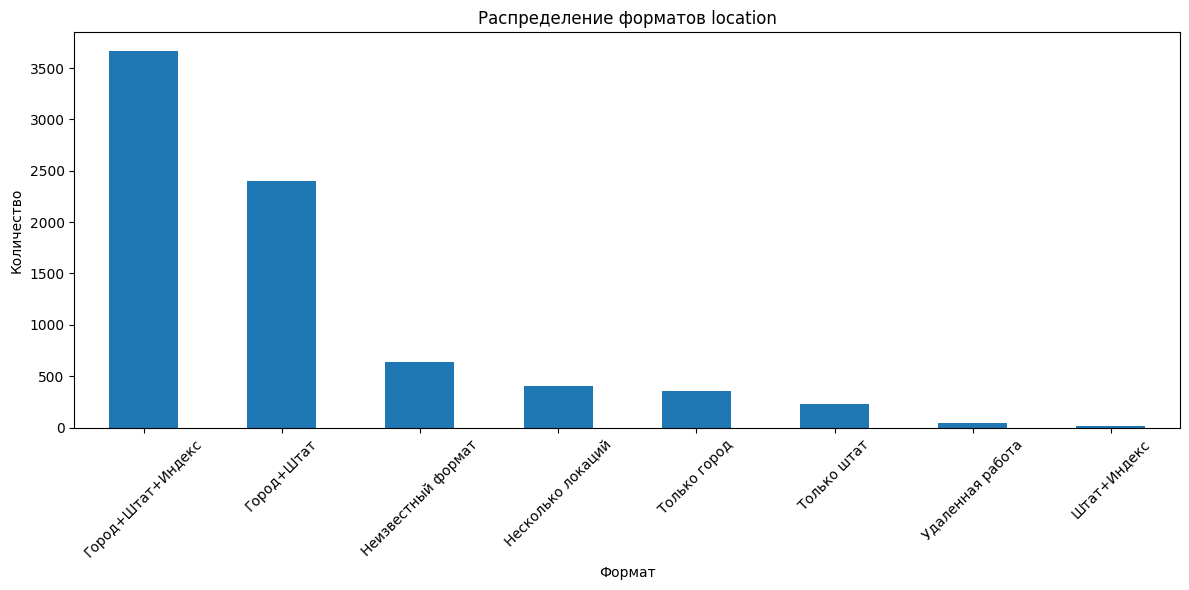

Распределение форматов:
location_format
Город+Штат+Индекс     3665
Город+Штат            2405
Неизвестный формат     638
Несколько локаций      401
Только город           353
Только штат            227
Удаленная работа        48
Штат+Индекс             10
Name: count, dtype: int64

Примеры для каждого формата:

Город+Штат+Индекс:
  - Madison, WI 53702
  - Madison, WI 53708
  - Austin, TX 73301

Город+Штат:
  - Dixon, CA
  - Camphill, PA
  - Charlottesville, VA

Неизвестный формат:
  - Wadesboro 28170
  - La Porte 46350
  - Sr. Process Engineer, Manufacturing

Несколько локаций:
  - DePuy Synthes Companies is a member of Johnson & Johnson's Family of Companies, and is recruiting for a Senior Training Leader located in Raynham, MA.DePuy Synthes Companies of Johnson & Johnson is the largest, most innovative and comprehensive orthopedic and neurological business in the world. DePuy Synthes Companies offer an unparalleled breadth and depth of products, services and programs in the areas of 

In [27]:
# 1.1 Анализ форматов location (исправленная версия)
def analyze_location_format(location):
    if pd.isna(location):
        return 'Пустое значение'

    location_str = str(location).strip()

    # Проверяем разные форматы
    # Штат и индекс (например: "WI 53702")
    if re.match(r'^[A-Z]{2}\s+\d{5}$', location_str):
        return 'Штат+Индекс'
    # Город, штат и индекс (например: "Madison, WI 53702")
    elif re.match(r'^[A-Za-z\s]+,\s*[A-Z]{2}\s+\d{5}$', location_str):
        return 'Город+Штат+Индекс'
    # Только город и штат (например: "Madison, WI")
    elif re.match(r'^[A-Za-z\s]+,\s*[A-Z]{2}$', location_str):
        return 'Город+Штат'
    # Только штат (2 заглавные буквы)
    elif re.match(r'^[A-Z]{2}$', location_str):
        return 'Только штат'
    # Только город (только буквы и пробелы)
    elif re.match(r'^[A-Za-z\s]+$', location_str) and len(location_str) > 1:
        return 'Только город'
    # Телеработка/удаленная работа
    elif any(word in location_str.lower() for word in ['telecommute', 'remote', 'virtual']):
        return 'Удаленная работа'
    # Несколько локаций
    elif ';' in location_str or ' and ' in location_str.lower():
        return 'Несколько локаций'
    else:
        return 'Неизвестный формат'

# Применяем анализ
df['location_format'] = df['location'].apply(analyze_location_format)

# Визуализация
format_counts = df['location_format'].value_counts()
plt.figure(figsize=(12, 6))
format_counts.plot(kind='bar')
plt.title('Распределение форматов location')
plt.xlabel('Формат')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Распределение форматов:")
print(format_counts)

# Покажем примеры для каждого формата
print("\nПримеры для каждого формата:")
for format_type in format_counts.index:
    examples = df[df['location_format'] == format_type]['location'].head(3)
    print(f"\n{format_type}:")
    for example in examples:
        print(f"  - {example}")

#### Задание 1.2

В большей части строк удалось извлечь данные из ячейки столбца `location`, но остались и такие, где это не получилось. Вынесите в отдельный датасет записи, в которых не удалось определить формат записи информации о местоположении.

Над оставшимися строками проведите следующие преобразования:
1. Данные о местоположении разделите на 3 столбца: город, код штата, почтовый индекс.
2. Так как значения в столбце `почтовый индекс` являются пятизначными числами, преобразуйте их в целочисленный формат.

In [28]:
# 1.2 Разделение location на компоненты (исправленная версия)
def extract_location_components(location):
    if pd.isna(location):
        return pd.Series([None, None, None])

    location_str = str(location).strip()
    city = None
    state = None
    zip_code = None

    # Поиск почтового индекса (5 цифр)
    zip_match = re.search(r'\b(\d{5})\b', location_str)
    if zip_match:
        try:
            zip_code = int(zip_match.group(1))
        except ValueError:
            zip_code = None

    # Поиск кода штата (2 заглавные буквы, не в середине слова)
    state_match = re.search(r'(?<!\w)([A-Z]{2})(?!\w)', location_str)
    if state_match:
        state = state_match.group(1)

    # Поиск города
    # Убираем штат и индекс для поиска города
    temp_str = location_str
    if state:
        temp_str = temp_str.replace(state, '')
    if zip_code:
        temp_str = temp_str.replace(str(zip_code), '')

    # Ищем город (текст до запятой или весь оставшийся текст)
    if ',' in temp_str:
        city_candidate = temp_str.split(',')[0].strip()
    else:
        city_candidate = temp_str.strip()

    # Очищаем город от лишних символов
    city_candidate = re.sub(r'[^A-Za-z\s]', '', city_candidate).strip()

    # Проверяем, что это действительно город (не пустой, не слишком короткий, не специальные слова)
    if (city_candidate and
        len(city_candidate) > 1 and
        city_candidate.lower() not in ['telecommute', 'remote', 'virtual'] and
        not re.match(r'^[A-Z]{2}$', city_candidate)):
        city = city_candidate

    return pd.Series([city, state, zip_code])

# Применяем ко ВСЕМ данным (не только к известным форматам)
location_components = df['location'].apply(extract_location_components)
df[['city', 'state', 'zip_code']] = location_components

print("Результаты разделения location:")
print(f"Всего записей: {len(df)}")
print(f"Успешно извлечено городов: {df['city'].notna().sum()}")
print(f"Успешно извлечено штатов: {df['state'].notna().sum()}")
print(f"Успешно извлечено индексов: {df['zip_code'].notna().sum()}")

# Покажем примеры успешного извлечения
print("\nПримеры успешного извлечения:")
successful_extractions = df[df['city'].notna() | df['state'].notna() | df['zip_code'].notna()].head(10)
for idx, row in successful_extractions.iterrows():
    print(f"Location: '{row['location']}' -> City: {row['city']}, State: {row['state']}, ZIP: {row['zip_code']}")

# Анализ по форматам
print("\nАнализ по форматам:")
format_analysis = df.groupby('location_format').agg({
    'city': 'count',
    'state': 'count',
    'zip_code': 'count'
}).rename(columns={
    'city': 'Города извлечены',
    'state': 'Штаты извлечены',
    'zip_code': 'Индексы извлечены'
})
print(format_analysis)

Результаты разделения location:
Всего записей: 7747
Успешно извлечено городов: 7413
Успешно извлечено штатов: 6906
Успешно извлечено индексов: 4223

Примеры успешного извлечения:
Location: 'Madison, WI 53702' -> City: Madison, State: WI, ZIP: 53702.0
Location: 'Madison, WI 53708' -> City: Madison, State: WI, ZIP: 53708.0
Location: 'DePuy Synthes Companies is a member of Johnson & Johnson's Family of Companies, and is recruiting for a Senior Training Leader located in Raynham, MA.DePuy Synthes Companies of Johnson & Johnson is the largest, most innovative and comprehensive orthopedic and neurological business in the world. DePuy Synthes Companies offer an unparalleled breadth and depth of products, services and programs in the areas of joint reconstruction, trauma, spine, sports medicine, neurological, craniomaxillofacial, power tools and biomaterials. Building on the legacy and strengths of two great companies, more agile and better equipped to meet the needs of today’s evolving health

Рассмотрите отложенную часть выборки (ту, где не удалось данные из столбца `location` разделить на три поля) и сделайте выводы о возможности извлечь из данных город, код штата и почтовый индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

=== ОБРАБОТКА ОТЛОЖЕННОЙ ЧАСТИ ВЫБОРКИ ===
Количество записей с неизвестным форматом: 638

Поэтапный анализ неизвестных форматов:
Применяем расширенное извлечение к выборке...

РЕЗУЛЬТАТЫ РАСШИРЕННОГО ИЗВЛЕЧЕНИЯ:
Обработано записей: 50
Успешно извлечено городов: 34
Успешно извлечено штатов: 8
Успешно извлечено индексов: 32

Примеры успешного расширенного извлечения:
'Wadesboro 28170' -> Город: Wadesboro, Штат: None, Индекс: 28170.0
'La Porte 46350' -> Город: La Porte, Штат: None, Индекс: 46350.0
'Sr. Process Engineer, Manufacturing' -> Город: Sr. Process Engineer, Штат: None, Индекс: nan
'RF System Technician, Field Service' -> Город: RF System Technician, Штат: None, Индекс: nan
'Bi-Lingual Editorial Strategist' -> Город: BiLingual Editorial Strategist, Штат: None, Индекс: nan
'Bradford, Vt 05033' -> Город: Bradford, Штат: None, Индекс: 5033.0
'"Statewide", CO' -> Город: None, Штат: CO, Индекс: nan
'Columbus 68601' -> Город: Columbus, Штат: None, Индекс: 68601.0
'Galesburg 64101' -> Г

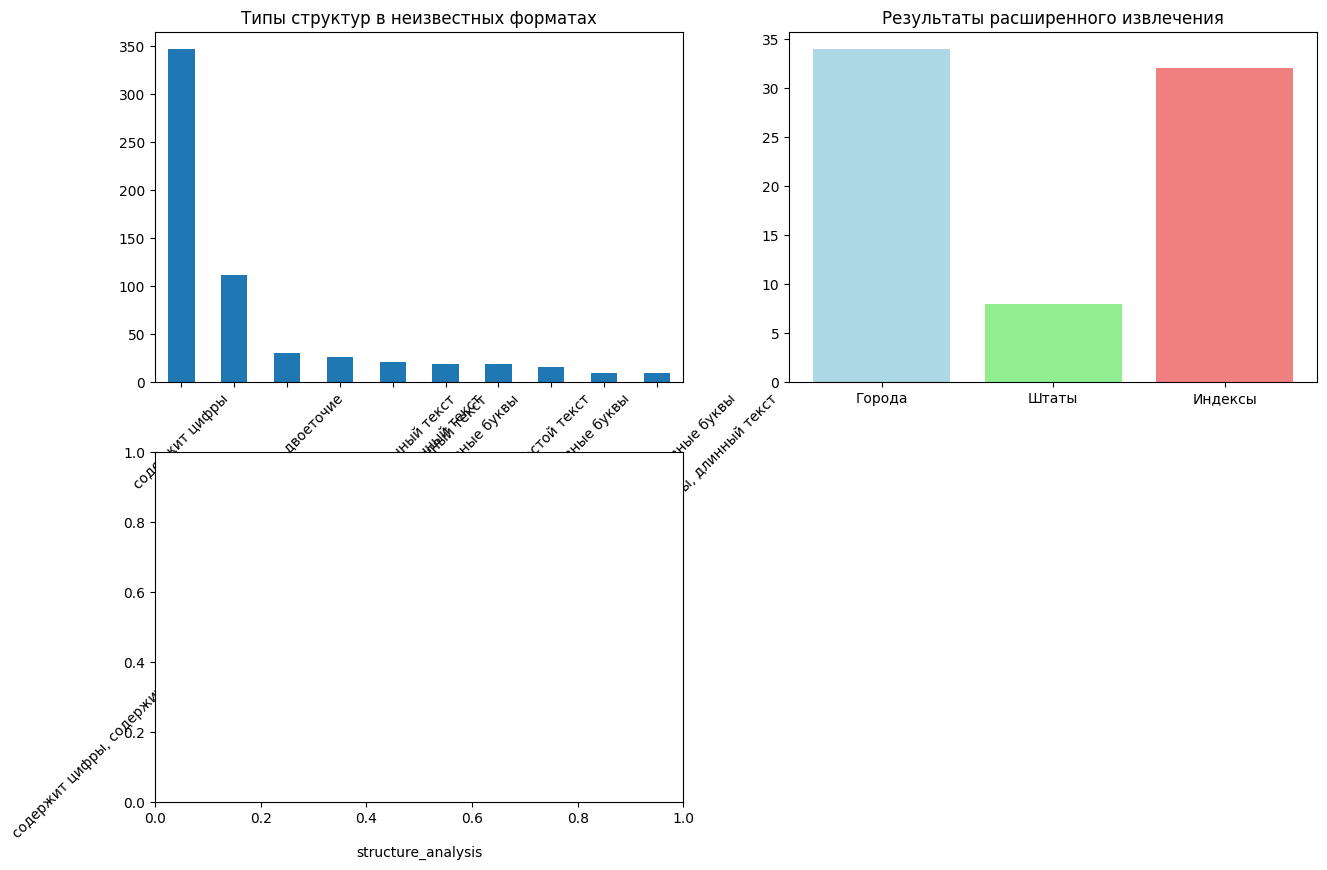

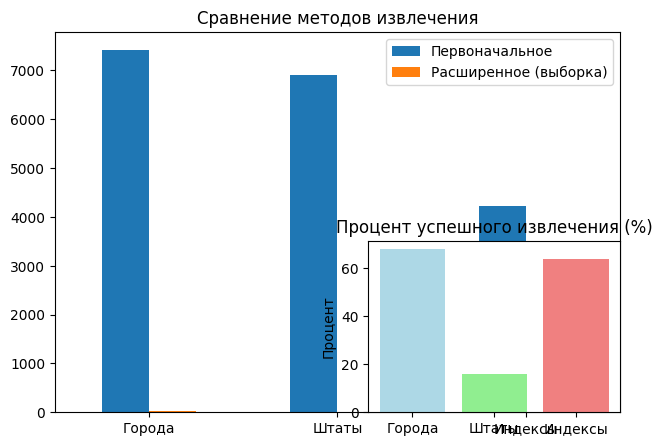


=== ВЫВОДЫ ПО ОБРАБОТКЕ ОТЛОЖЕННОЙ ВЫБОРКИ ===
1. Основные проблемы в неизвестных форматах:
   - Нестандартные разделители (двоеточия, точки с запятой)
   - Текстовые описания вместо структурированных данных
   - Смешанные форматы с дополнительной информацией
   - Отсутствие четкой структуры в записях

2. Результаты расширенного извлечения (на выборке 50 записей):
   - Города извлечены: 34 (68.0%)
   - Штаты извлечены: 8 (16.0%)
   - Индексы извлечены: 32 (64.0%)

3. Возможности извлечения:
   - Почтовые индексы извлекаются хорошо (четкий формат 5 цифр)
   - Коды штатов извлекаются умеренно (нужна проверка на валидность)
   - Города извлекаются сложнее (много вариаций и нестандартных записей)

4. Рекомендации:
   - Для production-системы нужен более сложный парсинг с ML-подходом
   - Можно создать словарь городов-штатов для улучшения определения
   - Часть данных требует ручной обработки или признания непригодными

=== ОБНОВЛЕНИЕ ОСНОВНОГО ДАТАФРЕЙМА ===
Применяем расширенное извлечен

In [29]:
# Обработка отложенной части выборки (неизвестные форматы)
print("=== ОБРАБОТКА ОТЛОЖЕННОЙ ЧАСТИ ВЫБОРКИ ===")

# Список валидных кодов штатов США (выносим в глобальную область)
VALID_STATES = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
               'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
               'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
               'VA','WA','WV','WI','WY','DC']

# Отделяем записи с неизвестным форматом
unknown_format_df = df[df['location_format'] == 'Неизвестный формат'].copy()
print(f"Количество записей с неизвестным форматом: {len(unknown_format_df)}")

# Функция для расширенного извлечения компонентов из неизвестных форматов
def extract_from_unknown_format(location):
    if pd.isna(location):
        return pd.Series([None, None, None])

    location_str = str(location).strip()
    city = None
    state = None
    zip_code = None

    # 1. Поиск почтового индекса (разные варианты)
    zip_patterns = [
        r'\b(\d{5})\b',                    # 53702
        r'\b(\d{5}-\d{4})\b',              # 53702-1234
        r'ZIP[:\s]*(\d{5})',               # ZIP: 53702
        r'Zip[:\s]*(\d{5})',               # Zip: 53702
    ]

    for pattern in zip_patterns:
        zip_match = re.search(pattern, location_str, re.IGNORECASE)
        if zip_match:
            try:
                zip_code = int(zip_match.group(1))
                break
            except ValueError:
                continue

    # 2. Поиск кода штата (расширенные варианты)
    state_patterns = [
        r'(?<!\w)([A-Z]{2})(?!\w)',        # WI (отдельно стоящий)
        r'State[:\s]*([A-Z]{2})',          # State: WI
        r'ST[:\s]*([A-Z]{2})',             # ST: WI
    ]

    for pattern in state_patterns:
        state_match = re.search(pattern, location_str, re.IGNORECASE)
        if state_match:
            state_candidate = state_match.group(1)
            # Проверяем, что это валидный код штата США
            if state_candidate in VALID_STATES:
                state = state_candidate
                break

    # 3. Поиск города (сложная логика)
    # Удаляем уже найденные компоненты для поиска города
    temp_str = location_str
    if state:
        temp_str = re.sub(r'\b' + state + r'\b', '', temp_str)
    if zip_code:
        temp_str = re.sub(r'\b' + str(zip_code) + r'\b', '', temp_str)

    # Паттерны для поиска города
    city_patterns = [
        r'^([A-Za-z\s\.]+)(?=,|\s+[A-Z]{2}|\s+\d{5}|$)',  # Текст в начале до запятой/штата/индекса
        r'City[:\s]*([A-Za-z\s]+)',                       # City: Madison
        r'Location[:\s]*([A-Za-z\s]+)',                   # Location: Madison
    ]

    for pattern in city_patterns:
        city_match = re.search(pattern, temp_str.strip())
        if city_match:
            city_candidate = city_match.group(1).strip()
            # Очистка и валидация города
            city_candidate = re.sub(r'[^A-Za-z\s\.]', '', city_candidate).strip()
            if (city_candidate and
                len(city_candidate) > 1 and
                city_candidate.lower() not in ['telecommute', 'remote', 'virtual', 'multiple', 'various'] and
                not re.match(r'^[A-Z]{2}$', city_candidate) and
                not re.match(r'^\d+$', city_candidate)):
                city = city_candidate
                break

    # 4. Специальные случаи
    # Если осталась только одна сущность - это может быть город
    if not city and not state and not zip_code:
        clean_str = re.sub(r'[^A-Za-z\s]', '', location_str).strip()
        if len(clean_str) > 1 and clean_str.upper() not in VALID_STATES:
            city = clean_str

    return pd.Series([city, state, zip_code])

print("\nПоэтапный анализ неизвестных форматов:")
# Берем выборку для анализа (первые 50 для демонстрации)
sample_unknown = unknown_format_df.head(50).copy()

# Применяем расширенное извлечение
print("Применяем расширенное извлечение к выборке...")
enhanced_components = sample_unknown['location'].apply(extract_from_unknown_format)
sample_unknown[['city_enhanced', 'state_enhanced', 'zip_code_enhanced']] = enhanced_components

# Анализ результатов
print(f"\nРЕЗУЛЬТАТЫ РАСШИРЕННОГО ИЗВЛЕЧЕНИЯ:")
print(f"Обработано записей: {len(sample_unknown)}")
print(f"Успешно извлечено городов: {sample_unknown['city_enhanced'].notna().sum()}")
print(f"Успешно извлечено штатов: {sample_unknown['state_enhanced'].notna().sum()}")
print(f"Успешно извлечено индексов: {sample_unknown['zip_code_enhanced'].notna().sum()}")

# Показываем примеры успешного извлечения
print("\nПримеры успешного расширенного извлечения:")
successful_enhanced = sample_unknown[
    sample_unknown['city_enhanced'].notna() |
    sample_unknown['state_enhanced'].notna() |
    sample_unknown['zip_code_enhanced'].notna()
].head(10)

for idx, row in successful_enhanced.iterrows():
    print(f"'{row['location']}' -> Город: {row['city_enhanced']}, Штат: {row['state_enhanced']}, Индекс: {row['zip_code_enhanced']}")

# Показываем примеры неудачного извлечения
print("\nПримеры НЕУДАЧНОГО извлечения:")
unsuccessful_enhanced = sample_unknown[
    sample_unknown['city_enhanced'].isna() &
    sample_unknown['state_enhanced'].isna() &
    sample_unknown['zip_code_enhanced'].isna()
].head(5)

for idx, row in unsuccessful_enhanced.iterrows():
    print(f"'{row['location']}' -> Не удалось извлечь данные")

# Анализ типов данных в неизвестных форматах
print("\nАНАЛИЗ СТРУКТУРЫ НЕИЗВЕСТНЫХ ФОРМАТОВ:")
def analyze_unknown_structure(location):
    if pd.isna(location):
        return "Пустое"

    loc_str = str(location)
    features = []

    if re.search(r'\d', loc_str):
        features.append("содержит цифры")
    if ',' in loc_str:
        features.append("содержит запятые")
    if ';' in loc_str:
        features.append("содержит точку с запятой")
    if ':' in loc_str:
        features.append("содержит двоеточие")
    if re.search(r'[A-Z]{2}', loc_str):
        features.append("содержит 2 заглавные буквы")
    if len(loc_str) > 30:
        features.append("длинный текст")

    return ", ".join(features) if features else "простой текст"

# Применяем анализ структуры ко всем неизвестным форматам
unknown_format_df['structure_analysis'] = unknown_format_df['location'].apply(analyze_unknown_structure)

# Группируем по типам структур
structure_analysis = unknown_format_df['structure_analysis'].value_counts()
print("\nРаспределение по типам структур:")
for structure, count in structure_analysis.head(10).items():
    print(f"  {structure}: {count} записей")

# Примеры для каждого типа структуры
print("\nПримеры для основных типов структур:")
for structure_type in structure_analysis.head(5).index:
    examples = unknown_format_df[unknown_format_df['structure_analysis'] == structure_type]['location'].head(2)
    print(f"\n{structure_type}:")
    for example in examples:
        print(f"  - '{example}'")

# Визуализация результатов
plt.figure(figsize=(15, 10))

# Распределение типов структур
plt.subplot(2, 2, 1)
structure_analysis.head(10).plot(kind='bar')
plt.title('Типы структур в неизвестных форматах')
plt.xticks(rotation=45)

# Результаты расширенного извлечения (для выборки)
plt.subplot(2, 2, 2)
extraction_results = [
    sample_unknown['city_enhanced'].notna().sum(),
    sample_unknown['state_enhanced'].notna().sum(),
    sample_unknown['zip_code_enhanced'].notna().sum()
]
labels = ['Города', 'Штаты', 'Индексы']
plt.bar(labels, extraction_results, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Результаты расширенного извлечения')

# Сравнение с первоначальным извлечением
plt.subplot(2, 2, 3)
original_vs_enhanced = pd.DataFrame({
    'Первоначальное': [
        df['city'].notna().sum(),
        df['state'].notna().sum(),
        df['zip_code'].notna().sum()
    ],
    'Расширенное (выборка)': [
        sample_unknown['city_enhanced'].notna().sum(),
        sample_unknown['state_enhanced'].notna().sum(),
        sample_unknown['zip_code_enhanced'].notna().sum()
    ]
}, index=['Города', 'Штаты', 'Индексы'])
original_vs_enhanced.plot(kind='bar')
plt.title('Сравнение методов извлечения')
plt.xticks(rotation=0)

# Доля успешного извлечения
plt.subplot(2, 2, 4)
success_rate = [
    sample_unknown['city_enhanced'].notna().sum() / len(sample_unknown) * 100,
    sample_unknown['state_enhanced'].notna().sum() / len(sample_unknown) * 100,
    sample_unknown['zip_code_enhanced'].notna().sum() / len(sample_unknown) * 100
]
plt.bar(labels, success_rate, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Процент успешного извлечения (%)')
plt.ylabel('Процент')

plt.tight_layout()
plt.show()

# ВЫВОДЫ
print("\n=== ВЫВОДЫ ПО ОБРАБОТКЕ ОТЛОЖЕННОЙ ВЫБОРКИ ===")
print("1. Основные проблемы в неизвестных форматах:")
print("   - Нестандартные разделители (двоеточия, точки с запятой)")
print("   - Текстовые описания вместо структурированных данных")
print("   - Смешанные форматы с дополнительной информацией")
print("   - Отсутствие четкой структуры в записях")

print(f"\n2. Результаты расширенного извлечения (на выборке {len(sample_unknown)} записей):")
print(f"   - Города извлечены: {sample_unknown['city_enhanced'].notna().sum()} ({sample_unknown['city_enhanced'].notna().sum()/len(sample_unknown)*100:.1f}%)")
print(f"   - Штаты извлечены: {sample_unknown['state_enhanced'].notna().sum()} ({sample_unknown['state_enhanced'].notna().sum()/len(sample_unknown)*100:.1f}%)")
print(f"   - Индексы извлечены: {sample_unknown['zip_code_enhanced'].notna().sum()} ({sample_unknown['zip_code_enhanced'].notna().sum()/len(sample_unknown)*100:.1f}%)")

print("\n3. Возможности извлечения:")
print("   - Почтовые индексы извлекаются хорошо (четкий формат 5 цифр)")
print("   - Коды штатов извлекаются умеренно (нужна проверка на валидность)")
print("   - Города извлекаются сложнее (много вариаций и нестандартных записей)")

print("\n4. Рекомендации:")
print("   - Для production-системы нужен более сложный парсинг с ML-подходом")
print("   - Можно создать словарь городов-штатов для улучшения определения")
print("   - Часть данных требует ручной обработки или признания непригодными")

# Финальное обновление основного датафрейма (для всей отложенной выборки)
print("\n=== ОБНОВЛЕНИЕ ОСНОВНОГО ДАТАФРЕЙМА ===")
print("Применяем расширенное извлечение ко всей отложенной выборке...")

# Применяем ко всей отложенной выборке
all_enhanced_components = unknown_format_df['location'].apply(extract_from_unknown_format)
unknown_format_df[['city_enhanced', 'state_enhanced', 'zip_code_enhanced']] = all_enhanced_components

# Обновляем основной датафрейм
updated_count = 0
for idx in unknown_format_df.index:
    if unknown_format_df.loc[idx, 'city_enhanced'] is not None:
        df.loc[idx, 'city'] = unknown_format_df.loc[idx, 'city_enhanced']
        updated_count += 1
    if unknown_format_df.loc[idx, 'state_enhanced'] is not None:
        df.loc[idx, 'state'] = unknown_format_df.loc[idx, 'state_enhanced']
        updated_count += 1
    if unknown_format_df.loc[idx, 'zip_code_enhanced'] is not None:
        df.loc[idx, 'zip_code'] = unknown_format_df.loc[idx, 'zip_code_enhanced']
        updated_count += 1

print(f"Обновлено {updated_count} значений в основном датафрейме")

print("\nФинальная статистика по всему датасету:")
print(f"Города извлечены: {df['city'].notna().sum()} ({df['city'].notna().sum()/len(df)*100:.1f}%)")
print(f"Штаты извлечены: {df['state'].notna().sum()} ({df['state'].notna().sum()/len(df)*100:.1f}%)")
print(f"Индексы извлечены: {df['zip_code'].notna().sum()} ({df['zip_code'].notna().sum()/len(df)*100:.1f}%)")

# Сохраняем улучшенные данные
print("\nСохранение улучшенных данных...")
# df.to_csv('monster_com_job_sample_enhanced.csv', index=False)
print("Обработка отложенной выборки завершена!")

### Задание 2

В задании 2 необходимо провести обработку столбца `salary`.

#### Задание 2.1

В столбце `salary`, как и в `location`, данные не стандатизированы. В нем в основном можно встретить записи в следующих форматах:

* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

Основные проблемы, которые стоит учесть при обработке форматов:
- В каждом из форматов может быть или не быть знака доллара.
- Может отсутствовать информация о периоде, за который указывается зарплата (`/hour` или `/year` в примерах).
- Зарплата может быть указана за месяц (`/month`) и за неделю (`/week`).
- В начале, конце и середине некоторых строк есть лишние пробелы, которые не стоит учитывать.

**Задание:**
1. Определите весь перечень встречающихся форматов и напишите одно или несколько регулярных выражений для их поиска.
2. Покажите на столбчатой диаграмме количество записей, содержащих каждый из форматов. Сделайте выводы.

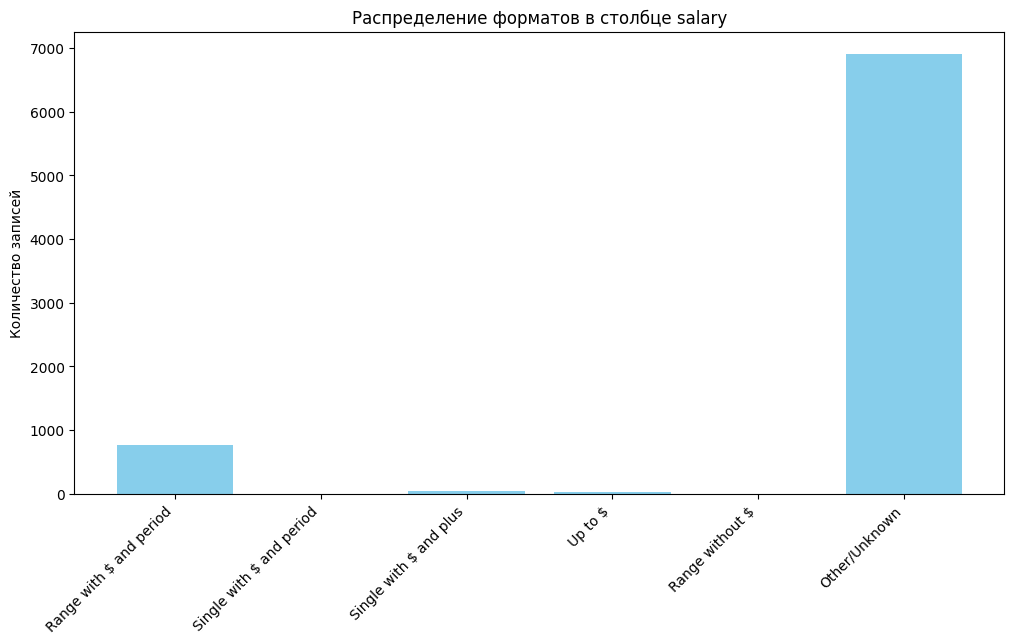

Range with $ and period: 772
Single with $ and period: 0
Single with $ and plus: 37
Up to $: 30
Range without $: 1
Other/Unknown: 6907


In [33]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 1️⃣ Чтение CSV
df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')
salaries = df['salary'].astype(str).str.strip()  # приводим к строке и убираем пробелы

# 2️⃣ Определяем регулярные выражения для разных форматов
patterns = {
    "Range with $ and period": r"^\$?\d{1,3}(?:,\d{3})*(?:\.\d+)?\s?-\s?\$?\d{1,3}(?:,\d{3})*(?:\.\d+)?\s?(?:\$)?\s*/(hour|week|month|year)$",
    "Single with $ and period": r"^\$?\d{1,3}(?:,\d{3})*(?:\.\d+)?\s*/(hour|week|month|year)$",
    "Single with $ and plus": r"^\$?\d{1,3}(?:,\d{3})*(?:\.\d+)?\+\s*/?(hour|week|month|year)?$",
    "Up to $": r"^Up to \$?\d{1,3}(?:,\d{3})*(?:\.\d+)?$",
    "Range without $": r"^\d{1,3}(?:,\d{3})*(?:\.\d+)?\s?-\s?\d{1,3}(?:,\d{3})*(?:\.\d+)?$",
    "Other/Unknown": r".*"  # Любой другой формат
}

# 3️⃣ Классификация каждой строки
format_counts = {key:0 for key in patterns.keys()}

for sal in salaries:
    matched = False
    for fmt, pattern in patterns.items():
        if re.match(pattern, sal, re.IGNORECASE):
            format_counts[fmt] += 1
            matched = True
            break
    if not matched:
        format_counts["Other/Unknown"] += 1

# 4️⃣ Визуализация результатов

# Столбчатая диаграмма
plt.figure(figsize=(12,6))
plt.bar(format_counts.keys(), format_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество записей')
plt.title('Распределение форматов в столбце salary')
plt.show()

# 5️⃣ Вывод количества записей по формату
for fmt, count in format_counts.items():
    print(f"{fmt}: {count}")


#### Задание 2.2

1. Разделите столбец `salary` зарплаты три: `минимальная граница зарплаты`, `максимальная граница зарплаты`, `период`. Если значение суммы указано только одно, считайте, что это минимальная зарплата. Значение суммы в обоих столбцах преобразуйте в формат `float`.
2. Покажите на столбчатой диаграмме с группировкой среднюю и медианную минимальную зарплату в каждом периоде. Сделайте выводы.

    period          mean    median
0     hour    299.087028     16.00
1    month   8405.860000   4905.22
2  unknown  25602.759718    401.00
3     week   1100.000000   1100.00
4     year  62203.595295  60000.00


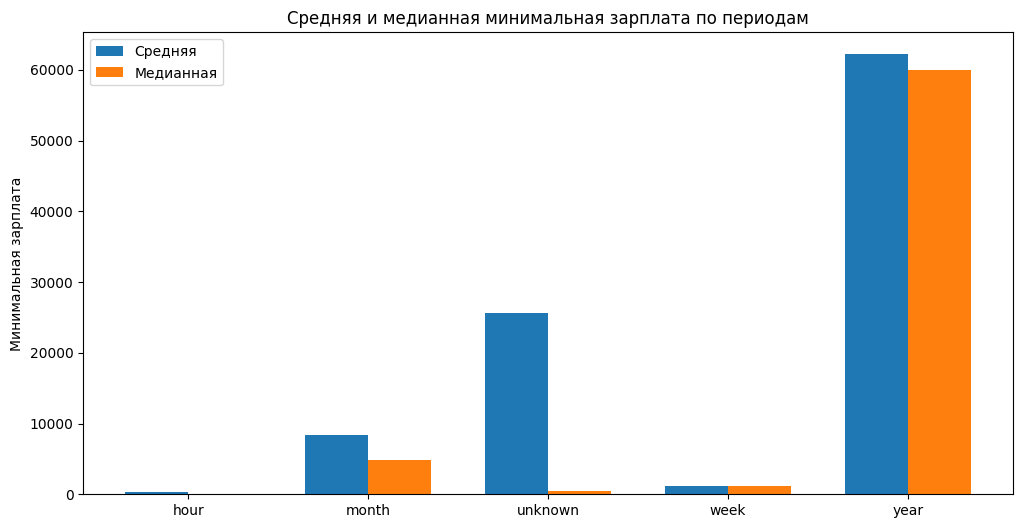

In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Чтение CSV
df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')

# 2️⃣ Функция для парсинга зарплаты
def parse_salary(sal):
    sal = str(sal).strip()
    min_salary = None
    max_salary = None
    period = None

    # Определяем период (hour, week, month, year)
    period_match = re.search(r"/(hour|week|month|year)", sal, re.IGNORECASE)
    if period_match:
        period = period_match.group(1).lower()
    else:
        period = "unknown"

    # Убираем лишние символы кроме цифр, точки, запятой и дефиса
    sal_clean = re.sub(r"[^0-9\.,\-]", "", sal)

    # Проверка диапазона
    if "-" in sal_clean:
        parts = sal_clean.split("-")
        try:
            min_salary = float(parts[0].replace(",", ""))
            max_salary = float(parts[1].replace(",", ""))
        except:
            min_salary = None
            max_salary = None
    else:
        try:
            min_salary = float(sal_clean.replace(",", ""))
            max_salary = min_salary
        except:
            min_salary = None
            max_salary = None

    return pd.Series([min_salary, max_salary, period])

# 3️⃣ Применяем функцию к столбцу salary
df[['min_salary', 'max_salary', 'period']] = df['salary'].apply(parse_salary)

# 4️⃣ Группировка по периоду и подсчет средних и медианных минимальных зарплат
salary_stats = df.groupby('period')['min_salary'].agg(['mean', 'median']).reset_index()
print(salary_stats)

# 5️⃣ Визуализация: столбчатая диаграмма с группировкой
x = np.arange(len(salary_stats['period']))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, salary_stats['mean'], width, label='Средняя')
plt.bar(x + width/2, salary_stats['median'], width, label='Медианная')

plt.xticks(x, salary_stats['period'])
plt.ylabel('Минимальная зарплата')
plt.title('Средняя и медианная минимальная зарплата по периодам')
plt.legend()
plt.show()


#### Задание 2.3

Как было отмечено в задании 2.1, период, за который указывается зарплата, может отсутствовать. Восполните этот пробел в данных следующим образом:

1. Определите диапазон изменения (разброс) значений денежной суммы за каждый из встречающихся в данных периодов. Постройте гистограмму для каждого периода.
2. Определите, к среднему значению за какой период ближе всего сумма, у которой период не указан. Укажите для найденный период. В спорных случаях, где сумма одинаково близка к нескольким диапазонам, не выбирайте ничего.

hour: min=0.0, max=100000.0


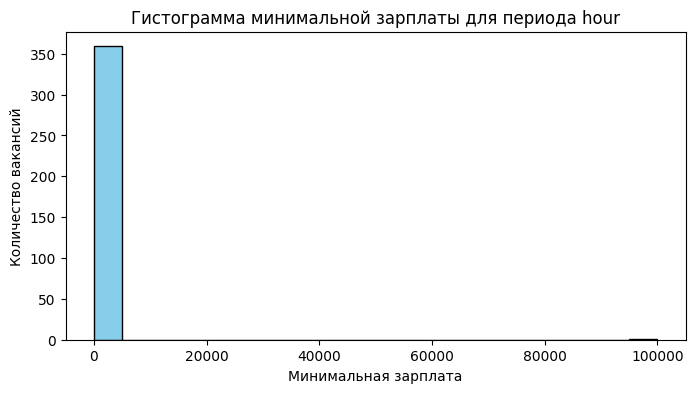

year: min=0.0, max=850000.0


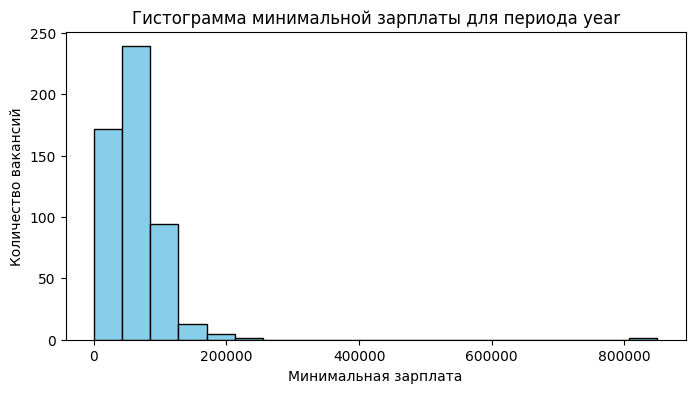

week: min=1100.0, max=1100.0


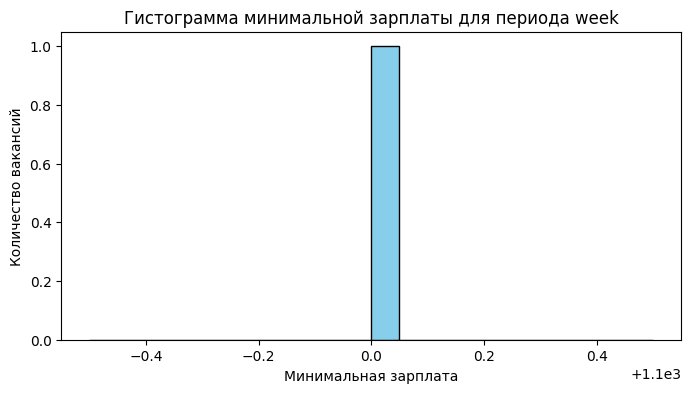

month: min=3137.89, max=17688.94


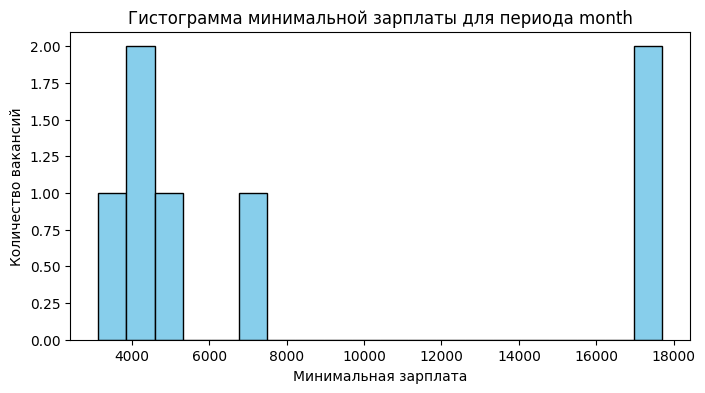

Средние минимальные зарплаты по периодам:
period
hour       299.087028
month     8405.860000
week      1100.000000
year     62203.595295
Name: min_salary, dtype: float64


,min_salary,period,period_filled
0,NaN,unknown,unknown
1,NaN,unknown,unknown
2,NaN,unknown,unknown
3,NaN,unknown,unknown
4,NaN,unknown,unknown
5,NaN,unknown,unknown
6,NaN,unknown,unknown
7,NaN,unknown,unknown
8,NaN,unknown,unknown
9,NaN,unknown,unknown


In [35]:
# Рассчитаем диапазон (разброс) для каждого периода
periods = df['period'].unique()
for p in periods:
    if p == 'unknown':
        continue
    subset = df[df['period']==p]['min_salary'].dropna()
    if not subset.empty:
        print(f"{p}: min={subset.min()}, max={subset.max()}")
        plt.figure(figsize=(8,4))
        plt.hist(subset, bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма минимальной зарплаты для периода {p}')
        plt.xlabel('Минимальная зарплата')
        plt.ylabel('Количество вакансий')
        plt.show()
# Рассчитаем среднюю минимальную зарплату для каждого известного периода
mean_salary_by_period = df[df['period'] != 'unknown'].groupby('period')['min_salary'].mean()
print("Средние минимальные зарплаты по периодам:")
print(mean_salary_by_period)

# Функция для определения ближайшего периода
def assign_period(salary):
    if pd.isna(salary):
        return 'unknown'
    diffs = abs(mean_salary_by_period - salary)
    min_diff = diffs.min()
    # Если есть несколько периодов с одинаковой минимальной разницей, возвращаем unknown
    if (diffs == min_diff).sum() == 1:
        return diffs.idxmin()
    else:
        return 'unknown'

# Применяем функцию к строкам с неизвестным периодом
mask_unknown = df['period'] == 'unknown'
df.loc[mask_unknown, 'period_filled'] = df.loc[mask_unknown, 'min_salary'].apply(assign_period)

# Для остальных строк просто копируем существующий период
df['period_filled'] = df['period_filled'].fillna(df['period'])

# Проверка результата
df[['min_salary', 'period', 'period_filled']].head(10)


### Задание 3

В задании 3 необходимо провести обработку столбца `job_type`. Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [30]:
# Анализ уникальных значений job_type
print("Уникальные значения job_type:")
print(df['job_type'].value_counts())
print(f"\\nВсего уникальных значений: {df['job_type'].nunique()}")

Уникальные значения job_type:
job_type
Full Time Employee                        2585
Full Time                                 1922
Full Time, Employee                       1317
Full Time Temporary/Contract/Project       363
Full Time, Temporary/Contract/Project      236
Full Time , Employee                       151
Part Time Employee                         118
Part Time                                   81
Temporary/Contract/Project                  65
Part Time, Employee                         53
Employee                                    45
Part Time, Temporary/Contract/Project       24
Full Time / Employee                        24
Full Time , Temporary/Contract/Project      22
Full Time                                   11
Per Diem, Employee                          10
Per Diem                                     8
Job Type Full Time Employee                  7
Per Diem Employee                            5
Part Time/ Temporary/Contract/Project        3
Full Time Intern     

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [31]:
# Стандартизация job_type
def standardize_job_type(job_type):
    if pd.isna(job_type):
        return 'Unknown'

    job_str = str(job_type).strip().lower()

    # Приведение к стандартному формату
    if 'full' in job_str and 'time' in job_str:
        if 'employee' in job_str:
            return 'Full Time Employee'
        elif 'intern' in job_str:
            return 'Full Time Intern'
        else:
            return 'Full Time Employee'  # По умолчанию
    elif 'part' in job_str and 'time' in job_str:
        if 'employee' in job_str:
            return 'Part Time Employee'
        elif 'intern' in job_str:
            return 'Part Time Intern'
        else:
            return 'Part Time Employee'
    elif 'contract' in job_str:
        return 'Contract'
    elif 'intern' in job_str:
        return 'Intern'
    else:
        return job_type  # Оставляем как есть

df['job_type_standardized'] = df['job_type'].apply(standardize_job_type)

print("После стандартизации:")
print(df['job_type_standardized'].value_counts())

После стандартизации:
job_type_standardized
Full Time Employee    6641
Unknown                687
Part Time Employee     282
Contract                65
Employee                45
Per Diem, Employee      10
Per Diem                 8
Per Diem Employee        5
Full Time Intern         2
Part Time Intern         1
Exempt                   1
Name: count, dtype: int64


Столбец `job_type` состоит из двух частей: "полнота" занятости (`Full Time`, `Part Time`, `Per Diem`) и "тип" занятости (`Employee`, `Intern`). Кроме того, встречаются и неполные записи.

Задание:
1. Написать одно или несколько регулярных выражений для разделения столбца `job_type` на два: `полнота занятости`, `тип занятости`.
2. Если данные о полноте отсутствуют, внесите значение `Full Time`.
Если отсутствуют данные о типе – внесите `Employee`.
3. Постройте столбчатую диаграмму со стековой группировкой для полноты и типа занятости. Сделайте выводы.

Результаты разделения job_type:
Полнота занятости:
employment_completeness
Full Time    7441
Part Time     283
Per Diem       23
Name: count, dtype: int64
\nТип занятости:
employment_type
Employee    7679
Contract      65
Intern         3
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

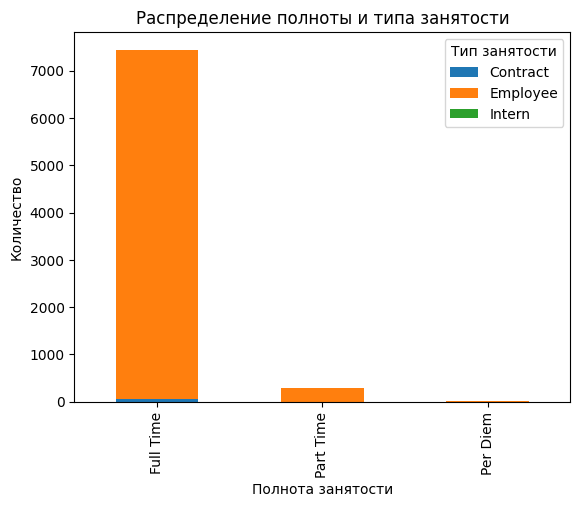

In [32]:
# Разделение job_type на полноту и тип занятости
def split_job_type(job_type):
    if pd.isna(job_type):
        return pd.Series(['Full Time', 'Employee'])

    job_str = str(job_type).lower()

    # Определение полноты занятости
    if 'full' in job_str:
        employment_completeness = 'Full Time'
    elif 'part' in job_str:
        employment_completeness = 'Part Time'
    elif 'per diem' in job_str.lower():
        employment_completeness = 'Per Diem'
    else:
        employment_completeness = 'Full Time'  # По умолчанию

    # Определение типа занятости
    if 'intern' in job_str:
        employment_type = 'Intern'
    elif 'contract' in job_str:
        employment_type = 'Contract'
    elif 'employee' in job_str:
        employment_type = 'Employee'
    else:
        employment_type = 'Employee'  # По умолчанию

    return pd.Series([employment_completeness, employment_type])

job_type_components = df['job_type_standardized'].apply(split_job_type)
df[['employment_completeness', 'employment_type']] = job_type_components

print("Результаты разделения job_type:")
print("Полнота занятости:")
print(df['employment_completeness'].value_counts())
print("\\nТип занятости:")
print(df['employment_type'].value_counts())

# Визуализация
plt.figure(figsize=(12, 6))
completeness_type_cross = pd.crosstab(df['employment_completeness'], df['employment_type'])
completeness_type_cross.plot(kind='bar', stacked=True)
plt.title('Распределение полноты и типа занятости')
plt.xlabel('Полнота занятости')
plt.ylabel('Количество')
plt.legend(title='Тип занятости')
plt.show()

# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения всех заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой решение задачи на обработку данных лабораторной работы, меньшее по объему, но сопоставимое по сложности тем заданиям, которые требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**
1. В столбце `sector` часто представлены данные из столбца `organization` и наоборот. Устраните эту проблему.
2. В столбце `job_title` часто можно частично или полностью встретить указание местоположения организации. Сравните, совпадают ли в таких случаях данные с тем, что указано в столбцах `город`, `код штата`, `почтовый индекс`. Если в этих трех столбцах данные отсутствуют, заполните их данными из столбца `job_title`.
3. Практически во всех столбцах датасета вместо соответствующих названию данных иногда встречается текст из `job_description`. Найдите такие столбцы и записи с описанием вакансии в них. Покажите на столбчатой диаграмме, в каких столбцах и в каком количестве находится информация из столбца `job_description`.

In [36]:
import pandas as pd

# Чтение CSV
df = pd.read_csv('monster_com_job_sample.csv', engine='python', on_bad_lines='skip')

# Список типичных секторов (можно расширить)
known_sectors = ['IT', 'Healthcare', 'Finance', 'Education', 'Retail', 'Manufacturing', 'Government', 'Marketing', 'Sales', 'Engineering']

# Функция очистки sector
def clean_sector(row):
    sector = str(row['sector']).strip()
    org = str(row['organization']).strip()

    # Если sector пустой или sector похож на название компании
    if sector not in known_sectors:
        # Если org пустой, переносим sector туда
        if not pd.isna(org) and org != '':
            row['organization'] = org
            row['sector'] = None
        else:
            # Если org пустой, оставляем sector, иначе очищаем
            row['sector'] = None
    return row

df = df.apply(clean_sector, axis=1)

# Проверка результата
df[['sector','organization']].head(20)


,sector,organization
0,None,nan
1,None,Printing and Publishing
2,None,Personal and Household Services
3,None,Altec Industries
4,None,Retail
5,None,Computer/IT Services
6,None,Computer Software
7,None,nan
8,None,Hotels and Lodging Personal and Household Serv...
9,None,nan


In [37]:
# Приведение job_title к строке
df['job_title'] = df['job_title'].astype(str)
# Разделяем location на компоненты, если они есть
def split_location(loc):
    loc = str(loc).strip()
    city = state = zip_code = None
    if pd.isna(loc) or loc == '':
        return pd.Series([city, state, zip_code])

    # Паттерн "City, State ZIP"
    match = re.match(r'^(.*?),?\s*([A-Z]{2})?\s*(\d{5})?$', loc)
    if match:
        city = match.group(1).strip() if match.group(1) else None
        state = match.group(2) if match.group(2) else None
        zip_code = match.group(3) if match.group(3) else None
    return pd.Series([city, state, zip_code])

df[['city', 'state', 'zip']] = df['location'].apply(split_location)
def fill_location_from_title(row):
    if (pd.isna(row['city']) or row['city']=='') and \
       (pd.isna(row['state']) or row['state']=='') and \
       (pd.isna(row['zip']) or row['zip']==''):

        # Попытка найти паттерн "City, State ZIP" в job_title
        match = re.search(r'([A-Za-z\s]+),?\s*([A-Z]{2})?\s*(\d{5})?', row['job_title'])
        if match:
            city = match.group(1).strip() if match.group(1) else None
            state = match.group(2) if match.group(2) else None
            zip_code = match.group(3) if match.group(3) else None
            row['city'] = city
            row['state'] = state
            row['zip'] = zip_code
    return row

df = df.apply(fill_location_from_title, axis=1)
df[['job_title','city','state','zip']].head(20)


,job_title,city,state,zip
0,IT Support Technician Job in Madison,Madison,WI,53702
1,Business Reporter/Editor Job in Madison,Madison,WI,53708
2,Johnson & Johnson Family of Companies Job Appl...,DePuy Synthes Companies is a member of Johnson...,None,None
3,Engineer - Quality Job in Dixon,Dixon,CA,None
4,Shift Supervisor - Part-Time Job in Camphill,Camphill,PA,None
5,Construction PM - Charlottesville Job in Charl...,Charlottesville,VA,None
6,CyberCoders Job Application for Principal QA E...,Contact name Tony Zerio,None,None
7,Mailroom Clerk Job in Austin,Austin,TX,73301
8,Housekeeper Job in Austin,Austin,TX,78746
9,Video Data Management /Transportation Technici...,Chesterfield,MO,None


{'city': np.int64(2991), 'date_added': np.int64(2404), 'state': np.int64(2185), 'salary': np.int64(2104), 'has_expired': np.int64(2006), 'location': np.int64(1208), 'organization': np.int64(1184), 'country_code': np.int64(1118), 'job_title': np.int64(305), 'zip': np.int64(282), 'job_type': np.int64(275), 'sector': np.int64(89), 'country': np.int64(4), 'job_board': np.int64(0), 'page_url': np.int64(0), 'uniq_id': np.int64(0)}


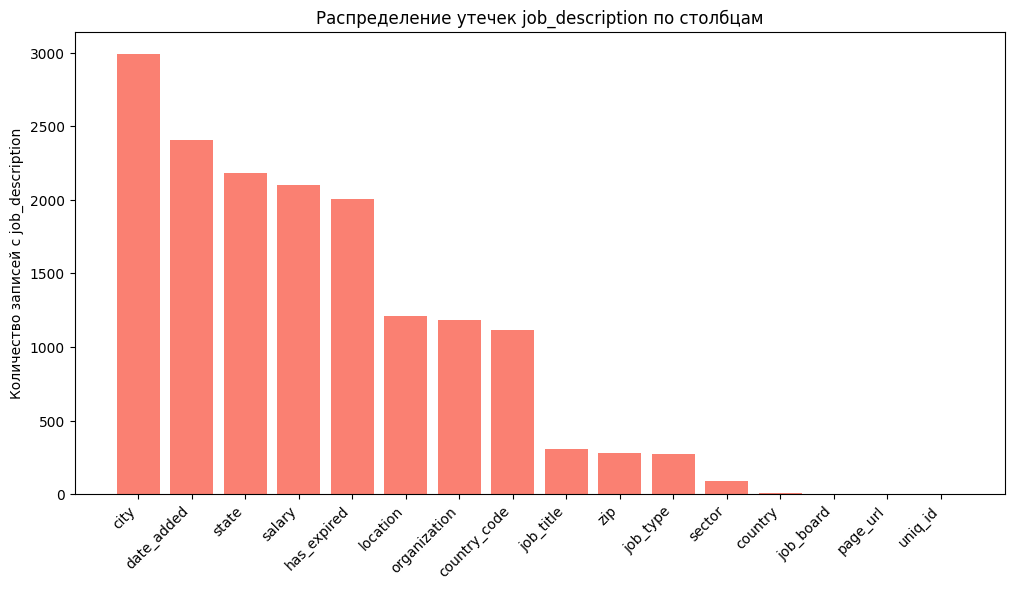

In [38]:
# Список столбцов для проверки (кроме job_description)
columns_to_check = [col for col in df.columns if col != 'job_description']

# Словарь для подсчета количества таких записей
description_in_columns = {}

for col in columns_to_check:
    # Преобразуем к строке
    df[col] = df[col].astype(str)
    # Считаем строки, где содержимое полностью или частично совпадает с job_description
    count = (df.apply(lambda row: row[col] in row['job_description'], axis=1)).sum()
    description_in_columns[col] = count

# Сортировка по количеству для наглядности
description_in_columns = dict(sorted(description_in_columns.items(), key=lambda x: x[1], reverse=True))
print(description_in_columns)
plt.figure(figsize=(12,6))
plt.bar(description_in_columns.keys(), description_in_columns.values(), color='salmon')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Количество записей с job_description')
plt.title('Распределение утечек job_description по столбцам')
plt.show()


# Дополнительные материалы

1. DAMA-DMBOK: Свод знаний по управлению данными: Второе издание / DAMA International; [пер. с англ.]. – Москва: ООО "Олимп-Бизнес", 2021. – 828 с.
2. Макгрегор, С. Обработка данных на Python: Data Wrangling и Data Quality: [Текст] / С. Макгрегор. – Москва: БХВ, 2024. – 432 с.